In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ema_workbench as ema

In [2]:
df = pd.read_csv("Prepared Data/500_experiments_results.csv")

In [5]:
df[[10,11,12]]

,Flood damage (Milj. Euro),Number of casualties,Costs
0,20392,821.924880,70.00
1,10182,370.869170,70.00
2,19627,512.941700,70.00
3,8806,149.819890,70.00
4,43822,1165.277450,70.00
5,33917,1258.973730,70.00
6,21155,674.091100,70.00
7,44453,805.183380,70.00
8,35930,1475.090400,70.00
9,18069,335.754400,70.00


In [6]:
costs = np.array(df[[10,11,12]])

In [7]:
def is_pareto_efficient_dumb(costs):
    """
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs>=c, axis=1))
    return is_efficient

In [8]:
a = is_pareto_efficient_dumb(costs)

In [12]:
sum(a)

1345

These policies are non-dominated:

In [15]:
df[a].head()

,DamFunctTbl_multiplier,ShipTbl1,ShipTbl2,ShipTbl3,climate scenarios,collaboration,fragility dikes,land use scenarios,model,policy,Flood damage (Milj. Euro),Number of casualties,Costs
2030,-0.064476,-0.059685,0.091571,0.028276,4,1.491980,0.006107,moreNature,waasmodel,Dike 1:500 +0.5m,1224,148.800,48.514472
2112,-0.020273,-0.085454,-0.078700,0.060708,10,1.191964,0.047635,NoChange,waasmodel,Dike 1:500 +0.5m,2674,18.497,81.564202
2139,-0.009048,0.021641,0.034322,0.073412,10,1.093079,0.015228,urbanizationLargeSteady,waasmodel,Dike 1:500 +0.5m,6203,48.417,81.564202
2149,0.005080,0.067741,0.047100,0.030813,10,1.276566,0.042583,urbanizationDeurbanization,waasmodel,Dike 1:500 +0.5m,4424,33.297,81.564202
2153,0.067854,0.084051,-0.030168,0.076229,10,1.483488,-0.030399,Deurbanization,waasmodel,Dike 1:500 +0.5m,2151,30.737,81.564202


## plot policies and scenarios

In [26]:
import seaborn as sns


In [23]:
df3 = df[a][['policy','climate scenarios']]

In [29]:
sns.stripplot(y='policy',x='climate scenarios',data=df3)

plt.show()

## find non-dominated for all scenarios 

In [16]:
for x in df[a]['policy'].unique():
    print(x)

Dike 1:500 +0.5m
Dike 1:500 extr.
Dike 1:1000
Dike 1:1000 extr.
Dike 2nd Q x 1.5
Coop Small
Alarm Early
no policy
Alarm Education


In [17]:
b = df[a]['climate scenarios'].unique()
b.sort()
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [42]:
for i in range (31):
    if i not in b:
        print(i)

0
2
5
9
12
15
18
19
22
25
28
29
30


In [62]:
costs = np.array(df[[11,12]])

In [63]:
a = is_pareto_efficient_dumb(costs)

In [80]:
b = []
b.extend(df[a].index.values)

# find all pareto solutions for each scenario

In [41]:
df.columns

Index(['DamFunctTbl_multiplier', 'ShipTbl1', 'ShipTbl2', 'ShipTbl3',
       'climate scenarios', 'collaboration', 'fragility dikes',
       'land use scenarios', 'model', 'policy', 'Flood damage (Milj. Euro)',
       'Number of casualties', 'Costs'],
      dtype='object')

In [47]:
df['Costs_cum'] = df[['Costs','Flood damage (Milj. Euro)']].sum(axis=1)

In [53]:
# df[[11,13]]

In [54]:
non_dominated_indexs = []
for clim_scen in sorted(df['climate scenarios'].unique()):
    scenario = df[df['climate scenarios'] == clim_scen]
    objectives = np.array(scenario[[11,13]])
    a = is_pareto_efficient_dumb(objectives)
    non_dominated_indexs.extend(scenario[a].index.values)

In [55]:
df2 = df.ix[non_dominated_indexs]

In [56]:
len(df2)

848

In [57]:
df3 = df2[['policy','climate scenarios']]

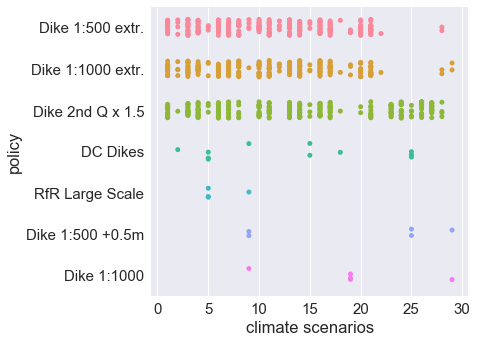

In [146]:
# figure = plt.figure(figsize=(10,20))
# sns.set_context("poster")
sns.set(font_scale=1.5, style="darkgrid")

# sns.despine()
# sns.set_style({'grid.color': '.9'})
sns.stripplot(y='policy',x='climate scenarios',data=df3,jitter = 0.2)
plt.gcf().subplots_adjust(bottom=0.15, left=0.35)
plt.savefig("policies_for_scenarios_grey",dpi = 400)
plt.show()